In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''Data Set Column Descriptions
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survived: Survival (0 = No; 1 = Yes)
name: Name
sex: Sex
age: Age
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
fare: Passenger fare (British pound)
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
adult_male: A male 18 or older (0 = No, 1=Yes)
deck: Deck of the ship
who: man (18+), woman (18+), child (<18)
alive: Yes, no
embarked_town: Port of embarkation ( Cherbourg, Queenstown, Southampton)
class: Passenger class (1st; 2nd; 3rd)
alone: 1= alone, 0= not alone ( you have at least 1 sibling, spouse, parent or child on board)'''

In [11]:
#load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.shape

(891, 15)

In [14]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
#Look at all of the values in each column & get a count 
for val in df:
   print(df[val].value_counts())
   print()

survived
0    549
1    342
Name: count, dtype: int64

pclass
3    491
1    216
2    184
Name: count, dtype: int64

sex
male      577
female    314
Name: count, dtype: int64

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

class
Third     491
First     216
Second    184
Name: count, dtype: int64

who
man      537
woman    271
child     83
Name: count, dtype: int64

adult_male
True     537
False    354
Name: count, dt

In [19]:
df =df.drop(labels=['deck','embark_town','alive','class','alone','adult_male','who'],axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [20]:
df['age'].fillna((df['age'].mean()),inplace=True)
df =df.dropna(axis=0)
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [21]:
df.shape

(889, 8)

In [22]:
#Print the unique values in the columns
print(df['sex'].unique())
print(df['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
df['sex']=le.fit_transform(df['sex'])

C:\Users\ARCHANA\AppData\Local\Temp\ipykernel_4708\1340687048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=le.fit_transform(df['sex'])


In [48]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [49]:
df['embarked']=le.fit_transform(df['embarked'])

C:\Users\ARCHANA\AppData\Local\Temp\ipykernel_4708\1342293272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked']=le.fit_transform(df['embarked'])


In [50]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<Axes: >

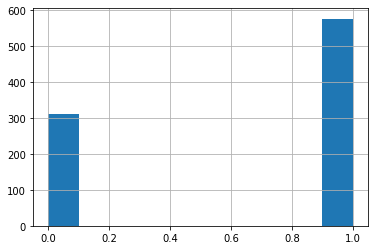

In [51]:
df['sex'].hist()

<Axes: >

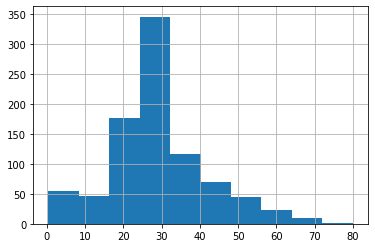

In [52]:
df['age'].hist()

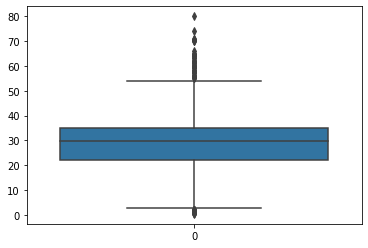

In [54]:
sns.boxplot(df['age'])
plt.show()

In [55]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
sibsp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


<Axes: >

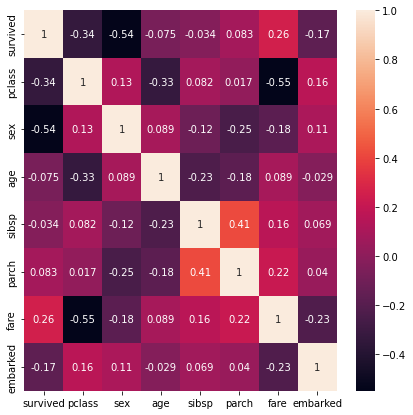

In [56]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr , annot=True ,ax=ax)

In [61]:
x = df.drop('survived',axis=1)
y = df['survived']

In [62]:
print(x)

     pclass  sex        age  sibsp  parch     fare  embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[889 rows x 7 columns]


In [63]:
x

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [64]:
x.shape


(889, 7)

In [65]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [66]:
y.shape

(889,)

In [71]:
from collections import Counter
print(Counter(y))
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 7)
x , y = oversample.fit_resample(x , y)
print(Counter(y))

Counter({0: 549, 1: 340})
Counter({0: 549, 1: 549})


In [72]:
x.shape

(1098, 7)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train ,x_test, y_train , y_test = train_test_split(x , y ,random_state=0,test_size=0.2)

In [74]:
model=RandomForestClassifier()

In [75]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
prediction=model.predict(x_test)

In [77]:
print(accuracy_score(y_test,prediction))

0.8545454545454545


In [78]:
from sklearn.linear_model import LogisticRegression
x_train ,x_test, y_train , y_test = train_test_split(x , y ,random_state=0,test_size=0.1)
model1 = LogisticRegression()

In [ ]:
model1.fit(x_train,y_train)

In [80]:
prediction1=model1.predict(x_test)

In [81]:
print(accuracy_score(y_test,prediction1))

0.7636363636363637


In [82]:
from sklearn.neighbors import KNeighborsClassifier
x_train ,x_test, y_train , y_test = train_test_split(x , y ,random_state=0,test_size=0.2)
model2= KNeighborsClassifier()

In [83]:
model2.fit(x_train , y_train)

KNeighborsClassifier()

In [84]:
prediction2=model2.predict(x_test)

In [85]:
print(accuracy_score(y_test,prediction2))

0.7272727272727273


In [86]:
from sklearn.tree import DecisionTreeClassifier
x_train ,x_test, y_train , y_test = train_test_split(x , y ,random_state=0,test_size=0.2)
model3= DecisionTreeClassifier()

In [87]:
model3.fit(x_train , y_train)

DecisionTreeClassifier()

In [88]:
prediction3=model3.predict(x_test)

In [89]:
print(accuracy_score(y_test,prediction3))

0.8545454545454545


In [90]:
from sklearn.svm import SVC
x_train ,x_test, y_train , y_test = train_test_split(x , y ,random_state=0,test_size=0.2)
model4= SVC()

In [91]:
model4.fit(x_train , y_train)

SVC()

In [92]:
prediction4=model4.predict(x_test)

In [93]:
print(accuracy_score(y_test,prediction3))

0.8545454545454545


In [ ]:
user_input=np.array([[3 , 1 , 22 , 1 , 0 , 7.25 ,2]])
prediction = model4.predict(user_input)
if prediction ==0:
    print("not survived")
else:
    print("survived")

In [ ]:
not survived